In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('../dataset2/dataset_McCabe.csv')

Separação dos dados e dos rótulos.

In [3]:
X = data.drop('defects',axis=1)
y = data['defects']

Dividir os dados em conjuntos de treinamento e teste.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Normalização de dados.

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
predictions = logreg.predict(X_test)

In [10]:
rfc_cv_score = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc') 

C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Classe real',
           xlabel='Classe prevista')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


[[2968   49]
 [ 575   57]]


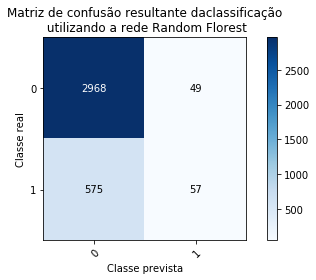

In [12]:
plot_confusion_matrix(y_test, predictions, classes=np.array([0,1]),
                      title='Matriz de confusão resultante da\
classificação\n utilizando a rede Random Florest');

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      3017
           1       0.54      0.09      0.15       632

    accuracy                           0.83      3649
   macro avg       0.69      0.54      0.53      3649
weighted avg       0.79      0.83      0.77      3649



<div style='text-align:left;width:40%;float:left;'>
    <a href="./Random_Forest.ipynb">Anterior</a>
</div>
<div style='text-align:right;width:30%; float:right'>
    <a href="./SVM.ipynb">Próximo</a>
</div>

https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652